# Implementing 2nd order polynomial regression with given samples

In [226]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
print(len(perch_length))
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
print(len(perch_weight))

56
56


Mean square error를 정의해 봅시다.

$$ MSE = \frac{1}{n} \sum_{\textrm{for all i's}}(\hat{y_i}-y_i)^2$$
- $ \hat{y_i}$: predicted value 
- $ y_i$: true value

주요 아이디어는 그래디언트의 반대 방향으로 작은 단계를 반복적으로 수행하여 미분 가능 함수의 로컬 최소값을 찾는 것

![](https://miro.medium.com/v2/resize:fit:790/format:webp/1*4Wob-p3zS7V9hBPlJ6kJjA.png)

- 선형 회귀의 경우 로컬 최소값을 찾아 손실 함수(MSE)를 최소화해야 함을 의미함
- 따라서 그래디언트를 계산하고 반복적으로 반대 방향으로 작은 단계를 수행
- 그래디언트를 계산할 수 있으려면 몇 가지 작업이 필요함
    - 각 매개변수에 대한 손실 함수의 1차 편도함수를 도출해야 함

우선, loss function을 정의해 봅시다.
$$ \displaystyle \hat{y_i} = w_1x_i^2 + w_2x_i + b $$
$$ \displaystyle \mathcal{L}(w, b) = \frac{1}{2n}\sum_{i=0}^{N-1}(\hat{y_i}-y_i)^2 $$

In [227]:
def calc_loss(w1, w2, b, x, y):
    n = len(x)
    return (1/(2*n)) * (((w1 * (x ** 2) + w2 * x + b) - y) ** 2).sum()

$w_1$에 대한 편미분:

$w_2$에 대한 편미분:

$b$에 대한 편미분:

In [228]:
def calc_dldw1(w1, w2, b, x, y):
    n = len(x)
    output = 0
    for ind in range(n):
        output += (w1 * (x[ind]**2) + w2 * x[ind] + b - y[ind]) * (x[ind] ** 2)
    output = output/n
    return output

In [229]:
def calc_dldw2(w1, w2, b, x, y):
    n = len(x)
    output = 0
    for ind in range(n):
        output += (w1 * (x[ind]**2) + w2 * x[ind] + b - y[ind]) * x[ind]
    output = output/n
    return output

In [230]:
def calc_dldb(w1, w2, b, x, y):
    n = len(x)
    output = 0
    for ind in range(n):
        output += (w1 * (x[ind]**2) + w2 * x[ind] + b - y[ind])
    output = output/n
    return output

## Revise the codes below, according to the environment and compare the parameters with $w_1 = 1.01$, $w_2 = - 21.6$, and $b = 116.05$.

우리는 $w$와 $b$에 대해 모르니, 랜덤하게 초기화합니다.

In [231]:
w1_esti = 10*np.random.rand(1)
w2_esti = 10*np.random.rand(1)
b_esti = 10*np.random.rand(1)
print(w1_esti, w2_esti, b_esti)

[4.79779625] [1.76603102] [4.80737759]


현재의 cost를 계산합니다.

In [232]:
x = perch_length
y = perch_weight
calc_loss(w1_esti, w2_esti, b_esti, x, y)

9595013.334946522

샘플 중 랜덤하게 10개 선택합시다.

In [233]:
idx = np.random.randint(56, size=10)

Iteration 이후 $w$와 $b$가 증가할지 감소할지 예상해 봅시다.

In [234]:
print(calc_dldw1(w1_esti, w2_esti, b_esti, x[idx], y[idx]))
print(calc_dldw2(w1_esti, w2_esti, b_esti, x[idx], y[idx]))
print(calc_dldb(w1_esti, w2_esti, b_esti, x[idx], y[idx]))

[4769355.84315761]
[138844.21931595]
[4198.93670012]


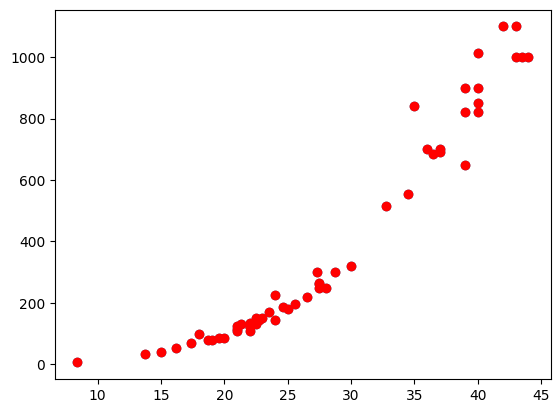

In [235]:

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.scatter(x, y, c='r')
plt.show()

In [236]:
print(f"w1_estimation_prev: {w1_esti}, w2_estimation_prev: {w2_esti}, b_estimation_prev: {b_esti}")
dldw1 = calc_dldw2(w1_esti, w2_esti, b_esti, x, y)
dldw2 = calc_dldw2(w1_esti, w2_esti, b_esti, x, y)
dldb = calc_dldb(w1_esti, w2_esti, b_esti, x, y)

w1_estimation_prev: [4.79779625], w2_estimation_prev: [1.76603102], b_estimation_prev: [4.80737759]


In [237]:
alpha = 0.1

w1_esti = w1_esti - alpha*dldw1
w2_esti = w2_esti - alpha*dldw2
b_esti = b_esti - alpha*dldb
print(f"w1_estimation_curr: {w1_esti}, w2_estimation_curr: {w2_esti}, b_estimation_curr: {b_esti}")
print(w1_esti.dtype)

w1_estimation_curr: [-12509.88105362], w2_estimation_curr: [-12512.91281885], b_estimation_curr: [-374.00164039]
float64


In [238]:
for iter in range(1000):
    print(f"Trial: {iter}")
    print(f"Current error: {calc_loss(w1_esti, w2_esti, b_esti, x, y)}")
    print(f"w1_esti: {w1_esti.round(4)}, w2_esti: {w2_esti.round(4)}, b_esti: {b_esti.round(4)}")
    idx = np.random.randint(56, size=10)
    dldw1 = calc_dldw1(w1_esti, w2_esti, b_esti, x[idx], y[idx])
    dldw2 = calc_dldw2(w1_esti, w2_esti, b_esti, x[idx], y[idx])
    dldb = calc_dldb(w1_esti, w2_esti, b_esti, x[idx], y[idx])
    w1_esti = w1_esti - alpha*dldw1
    w2_esti = w2_esti - alpha*dldw2
    b_esti = b_esti - alpha*dldb


Trial: 0
Current error: 83768572476808.3
w1_esti: [-12509.8811], w2_esti: [-12512.9128], b_esti: [-374.0016]
Trial: 1
Current error: 6.43642406845392e+23
w1_esti: [1.12668574e+09], w2_esti: [33317714.8363], b_esti: [1048551.7969]
Trial: 2
Current error: 4.1311022969302234e+33
w1_esti: [-9.02628306e+13], w2_esti: [-2.70225024e+12], b_esti: [-8.67553315e+10]
Trial: 3
Current error: 4.743792959623506e+43
w1_esti: [9.67287388e+18], w2_esti: [2.76435956e+17], b_esti: [8.2767796e+15]
Trial: 4
Current error: 2.2114478264981564e+53
w1_esti: [-6.60413437e+23], w2_esti: [-1.96860722e+22], b_esti: [-6.36157177e+20]
Trial: 5
Current error: 3.3004084329435405e+63
w1_esti: [8.06839144e+28], w2_esti: [2.23709858e+27], b_esti: [6.48115063e+25]
Trial: 6
Current error: 1.4392871292341278e+73
w1_esti: [-5.32759737e+33], w2_esti: [-1.67438959e+32], b_esti: [-5.62634961e+30]
Trial: 7
Current error: 9.296716057342712e+82
w1_esti: [4.28184577e+38], w2_esti: [1.31587146e+37], b_esti: [4.27158619e+35]
Trial: 8

C:\Users\ocean\AppData\Local\Temp\ipykernel_22760\3292381725.py:3: RuntimeWarning: overflow encountered in square
  return (1/(2*n)) * (((w1 * (x ** 2) + w2 * x + b) - y) ** 2).sum()
C:\Users\ocean\AppData\Local\Temp\ipykernel_22760\1191685581.py:5: RuntimeWarning: overflow encountered in multiply
  output += (w1 * (x[ind]**2) + w2 * x[ind] + b - y[ind]) * (x[ind] ** 2)
C:\Users\ocean\AppData\Local\Temp\ipykernel_22760\2326765620.py:4: RuntimeWarning: overflow encountered in multiply
  print(f"w1_esti: {w1_esti.round(4)}, w2_esti: {w2_esti.round(4)}, b_esti: {b_esti.round(4)}")
C:\Users\ocean\AppData\Local\Temp\ipykernel_22760\2326765620.py:9: RuntimeWarning: invalid value encountered in subtract
  w1_esti = w1_esti - alpha*dldw1


Trial: 179
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 180
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 181
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 182
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 183
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 184
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 185
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 186
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 187
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 188
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 189
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 190
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 191
Current error: nan
w1_esti: [nan], w2_esti: [nan], b_esti: [nan]
Trial: 192
C

[nan]
[nan]
[nan]


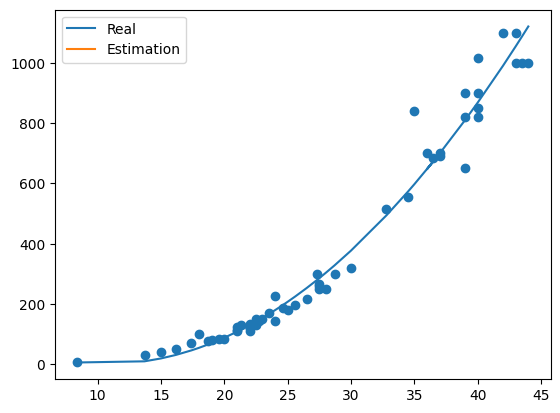

In [239]:
w1_true = 1.01
w2_true = -21.6
b_true = 116.05

print(w1_esti)
print(w2_esti)
print(b_esti)

plt.plot(x, w1_true*(x**2) + w2_true*x + b_true, label='Real')
plt.plot(x, w1_esti*(x**2) + w2_esti*x + b_esti, label='Estimation')
plt.scatter(x, y)
plt.legend()
plt.show()